In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [2]:
columns_to_read = ['overall', 'reviewText']
data = pd.read_csv('reviews.zip', compression='zip', usecols=columns_to_read)

In [3]:
data.shape

(4915, 2)

In [4]:
print(data.shape)
data.head()

(4915, 2)


,overall,reviewText
0,4.0,No issues.
1,5.0,"Purchased this for my device, it worked as adv..."
2,4.0,it works as expected. I should have sprung for...
3,5.0,This think has worked out great.Had a diff. br...
4,5.0,"Bought it with Retail Packaging, arrived legit..."


In [5]:
data.isnull().sum()

overall       0
reviewText    1
dtype: int64

In [6]:
data[data['reviewText'].isnull()]

,overall,reviewText
125,5.0,NaN


In [9]:
data.dropna(subset=['reviewText'], inplace=True)
data.shape

(4914, 2)

In [ ]:
value_counts_orig = data["overall"].value_counts()

In [42]:
value_counts_orig

overall
5.0    3921
4.0     527
1.0     244
3.0     142
2.0      80
Name: count, dtype: int64

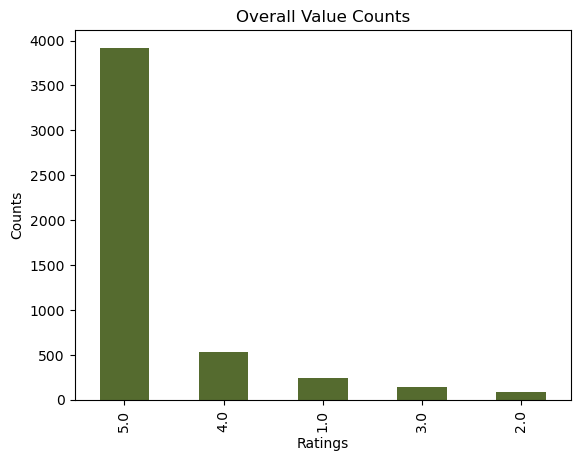

In [39]:
value_counts_orig.plot(kind='bar', color="darkolivegreen")
plt.title('Overall Value Counts')
plt.xlabel('Ratings')
plt.ylabel('Counts')

plt.show()

In [17]:
data['labels'] = data['overall'].apply(lambda x: 0 if x in [1, 2] else (1 if x in [4, 5] else None))
data = data.dropna()
data = data.reset_index(drop=True)

In [18]:
data.columns

Index(['overall', 'reviewText', 'labels'], dtype='object')

In [19]:
data.drop('overall', axis=1, inplace=True)

In [26]:
data.shape

(4772, 2)

In [40]:
value_counts = data["labels"].value_counts()
value_counts

labels
1.0    4448
0.0     324
Name: count, dtype: int64

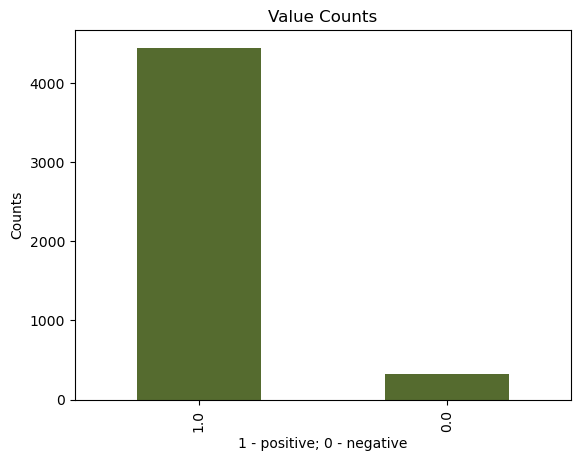

In [38]:
value_counts.plot(kind='bar', color="darkolivegreen")
plt.title('Value Counts')
plt.xlabel('1 - positive; 0 - negative')
plt.ylabel('Counts')

plt.show()

In [44]:
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    text = text.lower()
    return text

In [49]:
data['cleaned_reviews'] = data['reviewText'].apply(clean_text)

In [50]:
data.columns

Index(['reviewText', 'labels', 'cleaned_reviews'], dtype='object')

In [55]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/lono/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lono/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [70]:
def process_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text).lower()

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]

    return ' '.join(cleaned_tokens)

In [71]:
data["parsed_reviews"] = data["reviewText"].apply(process_text)

In [72]:
data.columns

Index(['reviewText', 'labels', 'cleaned_reviews', 'parsed_reviews'], dtype='object')

In [73]:
data.head()

,reviewText,labels,cleaned_reviews,parsed_reviews
0,No issues.,1.0,no issues,issu
1,"Purchased this for my device, it worked as adv...",1.0,purchased this for my device it worked as adve...,purchas devic work advertis never much phone m...
2,it works as expected. I should have sprung for...,1.0,it works as expected i should have sprung for ...,work expect sprung higher capac think made bit...
3,This think has worked out great.Had a diff. br...,1.0,this think has worked out greathad a diff bran...,think work greathad diff bran gb card went sou...
4,"Bought it with Retail Packaging, arrived legit...",1.0,bought it with retail packaging arrived legit ...,bought retail packag arriv legit orang envelop...


In [74]:
data.to_csv('parsed_reviews.csv', index=False)

Dataset used  
https://huggingface.co/datasets/hugginglearners/amazon-reviews-sentiment-analysis  
==  
https://www.kaggle.com/datasets/tarkkaanko/amazon  